# Wanted to see how the new normalisations looked

In [35]:
import torch
import torchvision.transforms as transforms
import torch.nn.functional as F
import video_dataset as Dataset
from torch.utils.data import DataLoader
torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [36]:
transform = transforms.Compose([
  transforms.Lambda(lambda x: Dataset.correct_num_frames(x, 16)),  # (T, C, H, W)
  transforms.Lambda(lambda x: x.float() / 255.0),  # Convert
  transforms.Lambda(lambda x: F.interpolate(x, size=(224, 224), mode='bilinear', align_corners=False)),  # Resize after normalization
  transforms.Lambda(lambda x: Dataset.normalise(x, mean=[0.43216, 0.394666, 0.37645], std=[0.22803, 0.22145, 0.216989])),  # Normalize per channel
  transforms.Lambda(lambda x: x.permute(1, 0, 2, 3)),  # (T, C, H, W) -> (C, T, H, W)
]) #This time trying the recommended transforms
raw_path = '../data/WLASL2000'
train_path = './preprocessed/labels/asl100/train_instances_fixed_bboxes_short.json'
classes_path = './wlasl_class_list.json'
train_set = Dataset.VideoDataset(
  raw_path,
  train_path,
  classes_path,
  transform=transform)
print(f"Length: {len(train_set)}")


Length: 1442


In [37]:
train_loader = DataLoader(
  train_set,
  batch_size=1,
  shuffle=False, #random seed is set, so still reproucable
  num_workers=0)
train_loader

In [38]:
frames1, label1 = next(iter(train_loader))
                       

In [39]:
print(frames1.shape)

torch.Size([1, 3, 16, 224, 224])


In [40]:
frames1 = frames1.squeeze(0)
print(frames1.shape)

torch.Size([3, 16, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8951892..2.4155426].


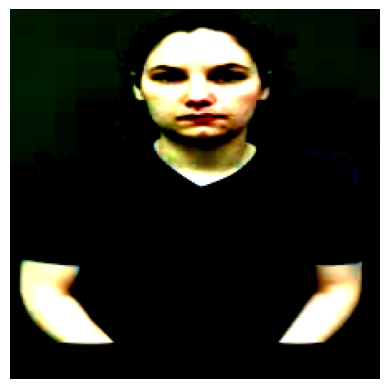

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8951892..2.430641].


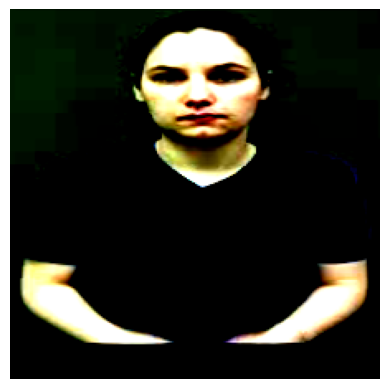

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8951892..2.430641].


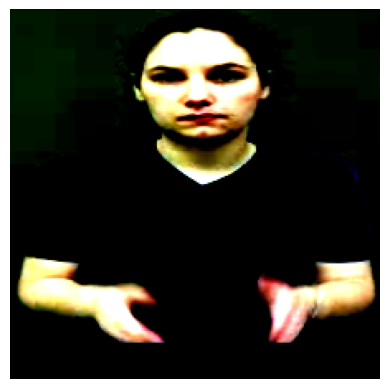

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8951892..2.4592967].


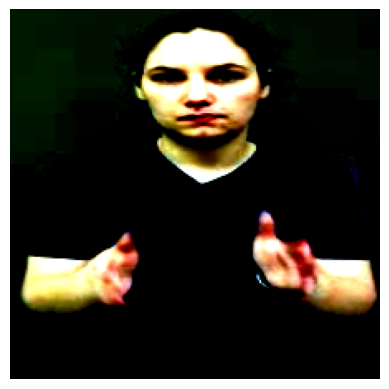

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8951892..2.4237347].


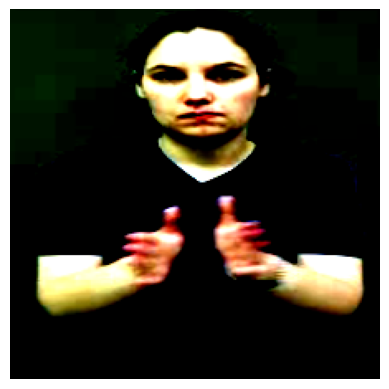

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8951892..2.4412932].


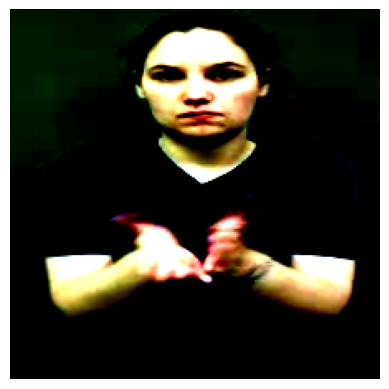

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8951892..2.730514].


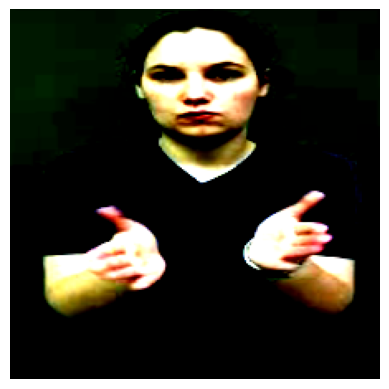

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8951892..2.4412932].


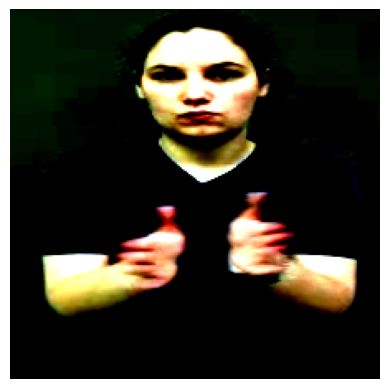

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8951892..2.4161768].


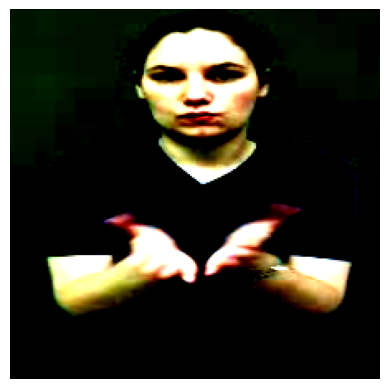

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8951892..2.4461298].


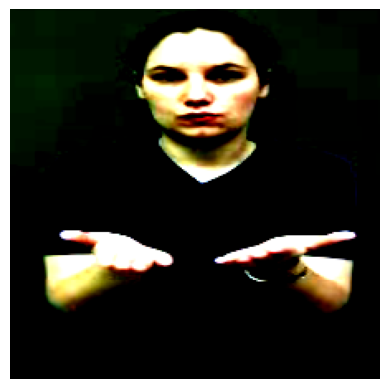

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8951892..2.4792407].


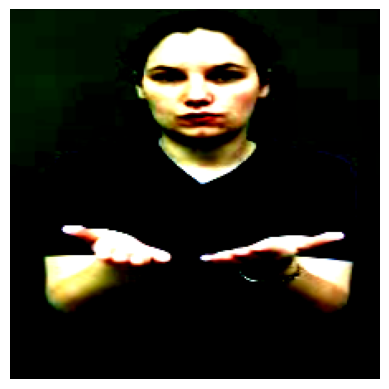

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8951892..2.4627187].


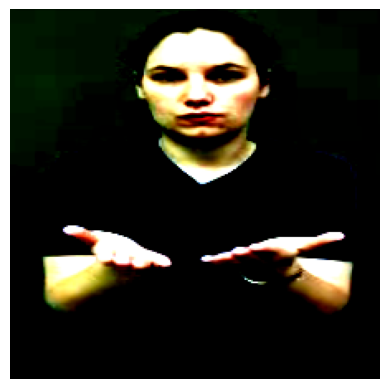

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8951892..2.4441946].


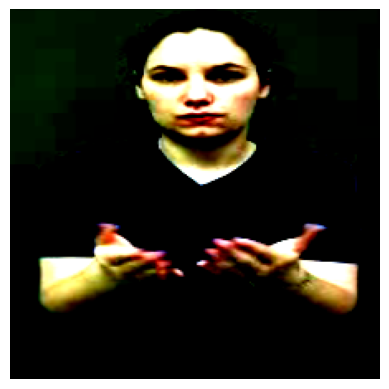

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8951892..2.4555347].


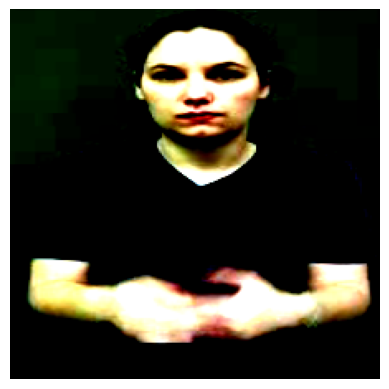

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8951892..2.4257076].


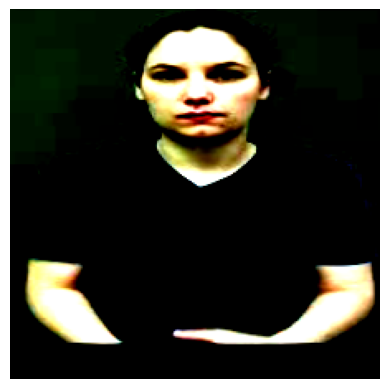

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8951892..2.4257076].


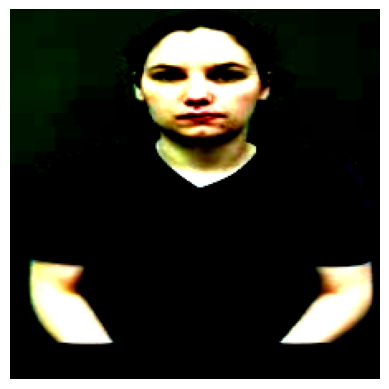

In [41]:
frames1 = frames1.permute(1, 0, 2, 3)  # (C, T, H, W) -> (T, C, H, W)
Dataset.visualise_frames(frames1, 10)

### These values actually look a lot better, will try training with these transforms


They did not yield much better results actually

# Quick test my random sampling method is working

In [ ]:
rand_frames = Dataset.sample(frames1, 10, randomise=True)
rand_frames2 = Dataset.sample(frames1, 10, randomise=False)

for i in range(len(rand_frames)):
  print(f"Random frame equals fixed frame: {torch.equal(rand_frames[i], rand_frames2[i])}")

Random frame equals fixed frame: True
Random frame equals fixed frame: False
Random frame equals fixed frame: False
Random frame equals fixed frame: False
Random frame equals fixed frame: False
Random frame equals fixed frame: False
Random frame equals fixed frame: False
Random frame equals fixed frame: False


IndexError: index 8 is out of bounds for dimension 0 with size 8